In [6]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd

# Question: Create a DataFrame from the dictionary {"Name": ["Alice", "Bob"], "Age": [25, 30]}.
data = {"Name": ["Alice", "Bob"], "Age": [25, 30]}
df = pd.DataFrame(data)
print("DataFrame created from dictionary:\n", df)


DataFrame created from dictionary:
     Name  Age
0  Alice   25
1    Bob   30


In [8]:
# Question: Check for missing values in the DataFrame.
df_missing = pd.DataFrame({"Name": ["Alice", None, "Charlie"], "Age": [25, 30, None]})
print("Original DataFrame:\n", df_missing)
print("\nMissing values in the DataFrame:\n", df_missing.isnull())
print("\nTotal missing values per column:\n", df_missing.isnull().sum())


Original DataFrame:
       Name   Age
0    Alice  25.0
1     None  30.0
2  Charlie   NaN

Missing values in the DataFrame:
     Name    Age
0  False  False
1   True  False
2  False   True

Total missing values per column:
 Name    1
Age     1
dtype: int64


In [9]:
# Question: Drop rows containing missing values.
df_dropped = df_missing.dropna()
print("DataFrame after dropping missing values:\n", df_dropped)


DataFrame after dropping missing values:
     Name   Age
0  Alice  25.0


In [10]:
# Question: Fill missing values in the "Age" column with the mean.
df_missing["Age"].fillna(df_missing["Age"].mean(), inplace=True)
print("DataFrame after filling missing values with the mean:\n", df_missing)


DataFrame after filling missing values with the mean:
       Name   Age
0    Alice  25.0
1     None  30.0
2  Charlie  27.5


In [11]:
# Question: Select the "Name" column from the DataFrame.
selected_column = df_missing["Name"]
print("Selected column (Name):\n", selected_column)


Selected column (Name):
 0      Alice
1       None
2    Charlie
Name: Name, dtype: object


In [12]:
# Question: Select rows where Age > 25.
filtered_rows = df_missing[df_missing["Age"] > 25]
print("Rows where Age > 25:\n", filtered_rows)


Rows where Age > 25:
       Name   Age
1     None  30.0
2  Charlie  27.5


In [13]:
# Question: Sort the DataFrame by "Age" in ascending order.
sorted_df = df_missing.sort_values(by="Age")
print("DataFrame sorted by Age:\n", sorted_df)


DataFrame sorted by Age:
       Name   Age
0    Alice  25.0
2  Charlie  27.5
1     None  30.0


In [14]:
# Question: Reset the index of the sorted DataFrame.
reset_index_df = sorted_df.reset_index(drop=True)
print("DataFrame after resetting index:\n", reset_index_df)


DataFrame after resetting index:
       Name   Age
0    Alice  25.0
1  Charlie  27.5
2     None  30.0


In [15]:
# Question: Add 5 to each value in the "Age" column.
df_missing["Age"] = df_missing["Age"].apply(lambda x: x + 5)
print("DataFrame after applying custom function to Age:\n", df_missing)


DataFrame after applying custom function to Age:
       Name   Age
0    Alice  30.0
1     None  35.0
2  Charlie  32.5


In [16]:
# Question: Group by "Name" and calculate the mean Age.
data = {"Name": ["Alice", "Bob", "Alice", "Charlie"], "Score": [85, 92, 78, 90]}
df = pd.DataFrame(data)
grouped_mean = df.groupby("Name")["Score"].mean()
print("Grouped DataFrame with mean Score:\n", grouped_mean)


Grouped DataFrame with mean Score:
 Name
Alice      81.5
Bob        92.0
Charlie    90.0
Name: Score, dtype: float64


In [17]:
# Question: Merge df1 and df2 based on the "ID" column.
df1 = pd.DataFrame({"ID": [1, 2], "Name": ["Alice", "Bob"]})
df2 = pd.DataFrame({"ID": [1, 2], "Score": [85, 92]})
merged_df = pd.merge(df1, df2, on="ID")
print("Merged DataFrame:\n", merged_df)


Merged DataFrame:
    ID   Name  Score
0   1  Alice     85
1   2    Bob     92


In [18]:
# Question: Concatenate df1 and df2 along rows.
concat_df = pd.concat([df1, df2], axis=0, ignore_index=True)
print("Concatenated DataFrame:\n", concat_df)


Concatenated DataFrame:
    ID   Name  Score
0   1  Alice    NaN
1   2    Bob    NaN
2   1    NaN   85.0
3   2    NaN   92.0


In [19]:
# Question: Get unique values from the "Name" column.
unique_names = df["Name"].unique()
print("Unique names in the Name column:\n", unique_names)


Unique names in the Name column:
 ['Alice' 'Bob' 'Charlie']


In [20]:
# Question: Remove duplicate rows from the DataFrame.
df = pd.DataFrame({"Name": ["Alice", "Bob", "Alice"], "Score": [85, 92, 85]})
print("Original DataFrame:\n", df)
df_no_duplicates = df.drop_duplicates()
print("\nDataFrame after dropping duplicates:\n", df_no_duplicates)


Original DataFrame:
     Name  Score
0  Alice     85
1    Bob     92
2  Alice     85

DataFrame after dropping duplicates:
     Name  Score
0  Alice     85
1    Bob     92


In [26]:
import pandas as pd

# Question: Create a pivot table with the sum and mean of "Score" grouped by "Name" and "Subject".
data = {
    "Name": ["Alice", "Bob", "Alice", "Charlie", "Bob", "Charlie"],
    "Subject": ["Math", "Math", "Science", "Math", "Science", "Science"],
    "Score": [85, 90, 78, 88, 92, 80],
}
df = pd.DataFrame(data)

# Pivot table with multiple aggregations
pivot_table = pd.pivot_table(df, values="Score", index="Name", columns="Subject", aggfunc=["sum", "mean"])
pivot_table


sum          mean        
Subject Math Science  Math Science
Name                              
Alice     85      78  85.0    78.0
Bob       90      92  90.0    92.0
Charlie   88      80  88.0    80.0

In [27]:
# Question: Perform a left join and replace missing "Score" with 0.
df1 = pd.DataFrame({"ID": [1, 2, 3], "Name": ["Alice", "Bob", "Charlie"]})
df2 = pd.DataFrame({"ID": [1, 2], "Score": [85, 92]})

# Left join and filling missing values
merged_df = pd.merge(df1, df2, on="ID", how="left")
merged_df["Score"].fillna(0, inplace=True)
merged_df


,ID,Name,Score
0,1,Alice,85.0
1,2,Bob,92.0
2,3,Charlie,0.0


In [28]:
# Question: Add a column showing the normalized Score within each Subject group.
df["Normalized_Score"] = df.groupby("Subject")["Score"].transform(lambda x: (x - x.mean()) / x.std())
df


,Name,Subject,Score,Normalized_Score
0,Alice,Math,85,-1.059626
1,Bob,Math,90,0.927173
2,Alice,Science,78,-0.704361
3,Charlie,Math,88,0.132453
4,Bob,Science,92,1.144586
5,Charlie,Science,80,-0.440225


In [29]:
# Question: Reshape the DataFrame to long format using melt, showing 'Subject' as a variable.
melted_df = pd.melt(df, id_vars=["Name"], value_vars=["Subject", "Score"])
melted_df


,Name,variable,value
0,Alice,Subject,Math
1,Bob,Subject,Math
2,Alice,Subject,Science
3,Charlie,Subject,Math
4,Bob,Subject,Science
5,Charlie,Subject,Science
6,Alice,Score,85
7,Bob,Score,90
8,Alice,Score,78
9,Charlie,Score,88


In [30]:
# Question: Rank the scores within each subject in descending order.
df["Rank"] = df.groupby("Subject")["Score"].rank(ascending=False)
print("DataFrame with ranks by Subject:\n", df)


DataFrame with ranks by Subject:
       Name  Subject  Score  Normalized_Score  Rank
0    Alice     Math     85         -1.059626   3.0
1      Bob     Math     90          0.927173   1.0
2    Alice  Science     78         -0.704361   3.0
3  Charlie     Math     88          0.132453   2.0
4      Bob  Science     92          1.144586   1.0
5  Charlie  Science     80         -0.440225   2.0


In [31]:
# Question: Filter rows where the "Name" contains the substring "li".
filtered_df = df[df["Name"].str.contains("li", case=False, regex=True)]
print("Filtered DataFrame where Name contains 'li':\n", filtered_df)


Filtered DataFrame where Name contains 'li':
       Name  Subject  Score  Normalized_Score  Rank
0    Alice     Math     85         -1.059626   3.0
2    Alice  Science     78         -0.704361   3.0
3  Charlie     Math     88          0.132453   2.0
5  Charlie  Science     80         -0.440225   2.0


In [32]:
# Question: Add a column showing cumulative sum of scores within each Subject group.
df["Cumulative_Sum"] = df.groupby("Subject")["Score"].cumsum()
print("DataFrame with cumulative sum by Subject:\n", df)


DataFrame with cumulative sum by Subject:
       Name  Subject  Score  Normalized_Score  Rank  Cumulative_Sum
0    Alice     Math     85         -1.059626   3.0              85
1      Bob     Math     90          0.927173   1.0             175
2    Alice  Science     78         -0.704361   3.0              78
3  Charlie     Math     88          0.132453   2.0             263
4      Bob  Science     92          1.144586   1.0             170
5  Charlie  Science     80         -0.440225   2.0             250


In [33]:
# Question: Identify and remove outliers using the IQR method.
Q1 = df["Score"].quantile(0.25)
Q3 = df["Score"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
no_outliers_df = df[(df["Score"] >= lower_bound) & (df["Score"] <= upper_bound)]
print("DataFrame after removing outliers:\n", no_outliers_df)


DataFrame after removing outliers:
       Name  Subject  Score  Normalized_Score  Rank  Cumulative_Sum
0    Alice     Math     85         -1.059626   3.0              85
1      Bob     Math     90          0.927173   1.0             175
2    Alice  Science     78         -0.704361   3.0              78
3  Charlie     Math     88          0.132453   2.0             263
4      Bob  Science     92          1.144586   1.0             170
5  Charlie  Science     80         -0.440225   2.0             250


In [34]:
# Question: Create a lag and lead column for scores within each Subject.
df["Lag_Score"] = df.groupby("Subject")["Score"].shift(1)
df["Lead_Score"] = df.groupby("Subject")["Score"].shift(-1)
print("DataFrame with Lag and Lead columns:\n", df)


DataFrame with Lag and Lead columns:
       Name  Subject  Score  Normalized_Score  Rank  Cumulative_Sum  Lag_Score  \
0    Alice     Math     85         -1.059626   3.0              85        NaN   
1      Bob     Math     90          0.927173   1.0             175       85.0   
2    Alice  Science     78         -0.704361   3.0              78        NaN   
3  Charlie     Math     88          0.132453   2.0             263       90.0   
4      Bob  Science     92          1.144586   1.0             170       78.0   
5  Charlie  Science     80         -0.440225   2.0             250       92.0   

   Lead_Score  
0        90.0  
1        88.0  
2        92.0  
3         NaN  
4        80.0  
5         NaN  


In [35]:
# Question: Resample a time series DataFrame to calculate monthly averages.
time_data = {
    "Date": pd.date_range("2024-01-01", periods=12, freq="D"),
    "Value": [10, 15, 8, 20, 25, 12, 14, 9, 30, 35, 18, 22],
}
time_df = pd.DataFrame(time_data)
time_df.set_index("Date", inplace=True)

# Resample to monthly frequency and calculate mean
monthly_avg = time_df.resample("M").mean()
print("Monthly average values:\n", monthly_avg)


Monthly average values:
                 Value
Date                 
2024-01-31  18.166667


In [36]:
import pandas as pd

# Question: Calculate a 3-day rolling average of scores.
data = {
    "Date": pd.date_range(start="2024-01-01", periods=10),
    "Score": [10, 12, 15, 20, 18, 25, 22, 30, 35, 40],
}
df = pd.DataFrame(data)

# Calculate rolling mean with a window size of 3
df["3-day Rolling Average"] = df["Score"].rolling(window=3).mean()
df


,Date,Score,3-day Rolling Average
0,2024-01-01,10,NaN
1,2024-01-02,12,NaN
2,2024-01-03,15,12.333333
3,2024-01-04,20,15.666667
4,2024-01-05,18,17.666667
5,2024-01-06,25,21.000000
6,2024-01-07,22,21.666667
7,2024-01-08,30,25.666667
8,2024-01-09,35,29.000000
9,2024-01-10,40,35.000000


In [37]:
# Question: Create a column that shows the difference between the current and previous row's score.
df["Score Difference"] = df["Score"].diff()
print("DataFrame with Score Difference:\n", df)


DataFrame with Score Difference:
         Date  Score  3-day Rolling Average  Score Difference
0 2024-01-01     10                    NaN               NaN
1 2024-01-02     12                    NaN               2.0
2 2024-01-03     15              12.333333               3.0
3 2024-01-04     20              15.666667               5.0
4 2024-01-05     18              17.666667              -2.0
5 2024-01-06     25              21.000000               7.0
6 2024-01-07     22              21.666667              -3.0
7 2024-01-08     30              25.666667               8.0
8 2024-01-09     35              29.000000               5.0
9 2024-01-10     40              35.000000               5.0


In [38]:
# Question: Pivot the DataFrame with multiple index levels.
data = {
    "Year": [2021, 2021, 2022, 2022],
    "Quarter": ["Q1", "Q2", "Q1", "Q2"],
    "Revenue": [200, 250, 300, 350],
    "Profit": [50, 70, 100, 120],
}
df = pd.DataFrame(data)

# Pivot the DataFrame
pivoted_df = df.pivot(index="Year", columns="Quarter", values=["Revenue", "Profit"])
print("Pivoted DataFrame:\n", pivoted_df)


Pivoted DataFrame:
         Revenue      Profit     
Quarter      Q1   Q2     Q1   Q2
Year                            
2021        200  250     50   70
2022        300  350    100  120


In [39]:
# Question: Apply a function to calculate revenue-to-profit ratio for each row.
df["Revenue_to_Profit_Ratio"] = df.apply(lambda x: x["Revenue"] / x["Profit"], axis=1)
print("DataFrame with Revenue-to-Profit Ratio:\n", df)


DataFrame with Revenue-to-Profit Ratio:
    Year Quarter  Revenue  Profit  Revenue_to_Profit_Ratio
0  2021      Q1      200      50                 4.000000
1  2021      Q2      250      70                 3.571429
2  2022      Q1      300     100                 3.000000
3  2022      Q2      350     120                 2.916667


In [40]:
# Question: Resample the time series data to weekly frequency and forward fill missing values.
time_data = {
    "Date": pd.date_range("2024-01-01", periods=10, freq="D"),
    "Value": [100, 200, 300, None, 500, None, 700, None, 900, 1000],
}
time_df = pd.DataFrame(time_data)
time_df.set_index("Date", inplace=True)

# Resample to weekly and fill missing values
resampled_df = time_df.resample("W").mean().fillna(method="ffill")
print("Resampled DataFrame with weekly average and missing values filled:\n", resampled_df)


Resampled DataFrame with weekly average and missing values filled:
             Value
Date             
2024-01-07  360.0
2024-01-14  950.0


In [41]:
# Question: Create a cross-tabulation of the number of employees by department and gender.
data = {
    "Department": ["Sales", "Sales", "HR", "HR", "IT", "IT"],
    "Gender": ["Male", "Female", "Female", "Male", "Male", "Female"],
}
df = pd.DataFrame(data)

# Create cross-tabulation
cross_tab = pd.crosstab(df["Department"], df["Gender"])
print("Cross-tabulation of departments and genders:\n", cross_tab)


Cross-tabulation of departments and genders:
 Gender      Female  Male
Department              
HR               1     1
IT               1     1
Sales            1     1


In [42]:
# Question: Calculate the percentage contribution of each department to the total count.
department_counts = df["Department"].value_counts(normalize=True) * 100
print("Percentage contribution of each department:\n", department_counts)


Percentage contribution of each department:
 Department
Sales    33.333333
HR       33.333333
IT       33.333333
Name: proportion, dtype: float64


In [43]:
# Question: Merge two DataFrames with different key columns.
df1 = pd.DataFrame({"Employee_ID": [1, 2, 3], "Name": ["Alice", "Bob", "Charlie"]})
df2 = pd.DataFrame({"Emp_ID": [1, 2, 4], "Salary": [50000, 60000, 70000]})

# Merge with different keys
merged_df = pd.merge(df1, df2, left_on="Employee_ID", right_on="Emp_ID", how="outer")
print("Merged DataFrame with different keys:\n", merged_df)


Merged DataFrame with different keys:
    Employee_ID     Name  Emp_ID   Salary
0          1.0    Alice     1.0  50000.0
1          2.0      Bob     2.0  60000.0
2          3.0  Charlie     NaN      NaN
3          NaN      NaN     4.0  70000.0


In [44]:
# Question: Rank employees based on Salary and Department in descending order.
df_salary = pd.DataFrame({
    "Employee": ["Alice", "Bob", "Charlie", "David"],
    "Department": ["Sales", "IT", "Sales", "HR"],
    "Salary": [50000, 60000, 55000, 52000],
})

# Ranking based on Salary and Department
df_salary["Rank"] = df_salary.groupby("Department")["Salary"].rank(ascending=False)
print("DataFrame with multi-column ranking:\n", df_salary)


DataFrame with multi-column ranking:
   Employee Department  Salary  Rank
0    Alice      Sales   50000   2.0
1      Bob         IT   60000   1.0
2  Charlie      Sales   55000   1.0
3    David         HR   52000   1.0


In [45]:
# Question: Detect duplicated rows and count them.
df_duplicates = pd.DataFrame({"Name": ["Alice", "Bob", "Alice", "Charlie"], "Score": [85, 92, 85, 90]})

# Detect duplicates
duplicate_rows = df_duplicates[df_duplicates.duplicated()]
print("Duplicated rows:\n", duplicate_rows)
print("\nTotal number of duplicate rows:", duplicate_rows.shape[0])


Duplicated rows:
     Name  Score
2  Alice     85

Total number of duplicate rows: 1


In [46]:
import pandas as pd

# Question: Group by "Department" and calculate total salary only for employees with salaries > 50,000.
data = {
    "Employee": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Department": ["Sales", "IT", "Sales", "HR", "IT"],
    "Salary": [45000, 60000, 55000, 48000, 70000],
}
df = pd.DataFrame(data)

# Conditional aggregation
grouped_sum = df.groupby("Department").apply(lambda x: x[x["Salary"] > 50000]["Salary"].sum())
print("Total salary for employees with salaries > 50,000 by department:\n", grouped_sum)


Total salary for employees with salaries > 50,000 by department:
 Department
HR            0
IT       130000
Sales     55000
dtype: int64


In [47]:
# Question: Set "Department" and "Employee" as multi-index and display the DataFrame.
multi_index_df = df.set_index(["Department", "Employee"])
print("Multi-indexed DataFrame:\n", multi_index_df)


Multi-indexed DataFrame:
                      Salary
Department Employee        
Sales      Alice      45000
IT         Bob        60000
Sales      Charlie    55000
HR         David      48000
IT         Eve        70000


In [48]:
# Question: Unstack the multi-index DataFrame to bring "Employee" as columns.
unstacked_df = multi_index_df.unstack(level=1)
print("Unstacked DataFrame:\n", unstacked_df)


Unstacked DataFrame:
              Salary                                    
Employee      Alice      Bob  Charlie    David      Eve
Department                                             
HR              NaN      NaN      NaN  48000.0      NaN
IT              NaN  60000.0      NaN      NaN  70000.0
Sales       45000.0      NaN  55000.0      NaN      NaN


In [49]:
# Question: Fill missing values in the salary column using linear interpolation.
df_missing = pd.DataFrame({"Employee": ["Alice", "Bob", "Charlie"], "Salary": [45000, None, 55000]})
df_missing["Salary"] = df_missing["Salary"].interpolate(method="linear")
print("DataFrame after linear interpolation:\n", df_missing)


DataFrame after linear interpolation:
   Employee   Salary
0    Alice  45000.0
1      Bob  50000.0
2  Charlie  55000.0


In [50]:
# Question: Bin salaries into categories like "Low", "Medium", and "High".
bins = [0, 50000, 60000, 80000]
labels = ["Low", "Medium", "High"]
df["Salary_Category"] = pd.cut(df["Salary"], bins=bins, labels=labels)
print("DataFrame with salary categories:\n", df)


DataFrame with salary categories:
   Employee Department  Salary Salary_Category
0    Alice      Sales   45000             Low
1      Bob         IT   60000          Medium
2  Charlie      Sales   55000          Medium
3    David         HR   48000             Low
4      Eve         IT   70000            High


In [51]:
import numpy as np

# Question: Create a column that marks employees as "Senior" if their salary > 60,000, otherwise "Junior".
df["Position"] = np.where(df["Salary"] > 60000, "Senior", "Junior")
print("DataFrame with Position column:\n", df)


DataFrame with Position column:
   Employee Department  Salary Salary_Category Position
0    Alice      Sales   45000             Low   Junior
1      Bob         IT   60000          Medium   Junior
2  Charlie      Sales   55000          Medium   Junior
3    David         HR   48000             Low   Junior
4      Eve         IT   70000            High   Senior


In [52]:
from scipy.stats import zscore

# Question: Detect rows where the salary is an outlier using z-score.
df["Z-Score"] = zscore(df["Salary"])
outliers_df = df[df["Z-Score"].abs() > 2]
print("Outliers in the DataFrame:\n", outliers_df)


Outliers in the DataFrame:
 Empty DataFrame
Columns: [Employee, Department, Salary, Salary_Category, Position, Z-Score]
Index: []


In [53]:
# Question: Add an expanding sum column for salaries.
df["Expanding_Sum"] = df["Salary"].expanding().sum()
print("DataFrame with expanding sum:\n", df)


DataFrame with expanding sum:
   Employee Department  Salary Salary_Category Position   Z-Score  \
0    Alice      Sales   45000             Low   Junior -1.189286   
1      Bob         IT   60000          Medium   Junior  0.493666   
2  Charlie      Sales   55000          Medium   Junior -0.067318   
3    David         HR   48000             Low   Junior -0.852696   
4      Eve         IT   70000            High   Senior  1.615634   

   Expanding_Sum  
0        45000.0  
1       105000.0  
2       160000.0  
3       208000.0  
4       278000.0  


In [54]:
# Question: Convert the DataFrame into a long format using stack().
stacked = df.set_index(["Department", "Employee"]).stack()
print("Stacked DataFrame (long format):\n", stacked)


Stacked DataFrame (long format):
 Department  Employee                 
Sales       Alice     Salary                45000
                      Salary_Category         Low
                      Position             Junior
                      Z-Score           -1.189286
                      Expanding_Sum       45000.0
IT          Bob       Salary                60000
                      Salary_Category      Medium
                      Position             Junior
                      Z-Score            0.493666
                      Expanding_Sum      105000.0
Sales       Charlie   Salary                55000
                      Salary_Category      Medium
                      Position             Junior
                      Z-Score           -0.067318
                      Expanding_Sum      160000.0
HR          David     Salary                48000
                      Salary_Category         Low
                      Position             Junior
                      Z-Scor

In [55]:
# Question: Create a lagged feature for the "Value" column to predict the next day's value.
time_series_data = pd.DataFrame({"Date": pd.date_range("2024-01-01", periods=5), "Value": [100, 200, 300, 400, 500]})
time_series_data["Previous_Day_Value"] = time_series_data["Value"].shift(1)
print("Time series data with lagged feature:\n", time_series_data)


Time series data with lagged feature:
         Date  Value  Previous_Day_Value
0 2024-01-01    100                 NaN
1 2024-01-02    200               100.0
2 2024-01-03    300               200.0
3 2024-01-04    400               300.0
4 2024-01-05    500               400.0


In [56]:
# Question: Concatenate two DataFrames with different columns and fill missing values with 0.
df1 = pd.DataFrame({"A": [1, 2], "B": [3, 4]})
df2 = pd.DataFrame({"B": [5, 6], "C": [7, 8]})

# Concatenate with axis=0 (rows)
concat_df = pd.concat([df1, df2], axis=0, sort=False).fillna(0)
print("Concatenated DataFrame:\n", concat_df)


Concatenated DataFrame:
      A  B    C
0  1.0  3  0.0
1  2.0  4  0.0
0  0.0  5  7.0
1  0.0  6  8.0


In [57]:
# Question: Check if two DataFrames are equal.
df_a = pd.DataFrame({"X": [1, 2, 3], "Y": [4, 5, 6]})
df_b = pd.DataFrame({"X": [1, 2, 3], "Y": [4, 5, 6]})
are_equal = df_a.equals(df_b)
print("Are the two DataFrames equal?:", are_equal)


Are the two DataFrames equal?: True


Descriptive Statistics:
              Sales
count  1000.000000
mean    197.737165
std      49.376352
min      47.692847
25%     165.078997
50%     197.098598
75%     230.347530
max     337.967756


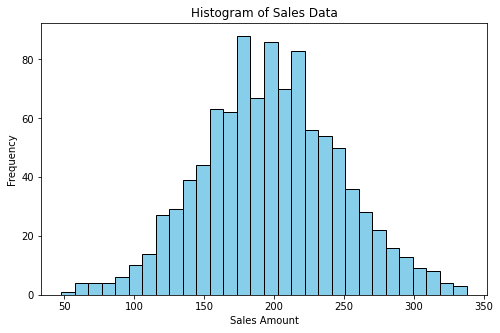

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame
np.random.seed(0)
sales_data = pd.DataFrame({"Sales": np.random.normal(loc=200, scale=50, size=1000)})

# Descriptive Statistics
print("Descriptive Statistics:\n", sales_data.describe())

# Plot Histogram
plt.figure(figsize=(8, 5))
plt.hist(sales_data["Sales"], bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram of Sales Data")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()


Correlation Matrix:
           Feature1  Feature2  Feature3
Feature1  1.000000 -0.062407 -0.121802
Feature2 -0.062407  1.000000  0.041042
Feature3 -0.121802  0.041042  1.000000


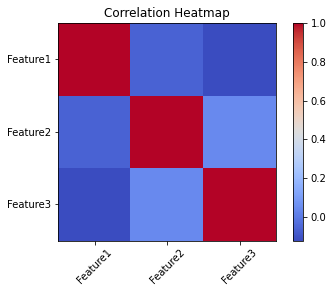

In [59]:
# Sample DataFrame
np.random.seed(1)
df_corr = pd.DataFrame({
    "Feature1": np.random.randint(50, 200, 100),
    "Feature2": np.random.randint(30, 100, 100),
    "Feature3": np.random.randint(40, 150, 100),
})

# Correlation Matrix
correlation_matrix = df_corr.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap
plt.figure(figsize=(6, 4))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="none")
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(df_corr.shape[1]), df_corr.columns, rotation=45)
plt.yticks(range(df_corr.shape[1]), df_corr.columns)
plt.show()


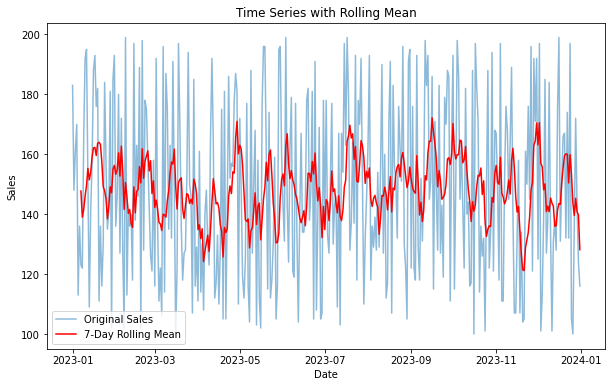

In [60]:
# Time Series Data
date_rng = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
time_series = pd.DataFrame({"Date": date_rng, "Sales": np.random.randint(100, 200, len(date_rng))})
time_series.set_index("Date", inplace=True)

# Calculate Rolling Mean (7-day window)
time_series["7-Day Rolling Mean"] = time_series["Sales"].rolling(window=7).mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series["Sales"], label="Original Sales", alpha=0.5)
plt.plot(time_series.index, time_series["7-Day Rolling Mean"], label="7-Day Rolling Mean", color="red")
plt.title("Time Series with Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


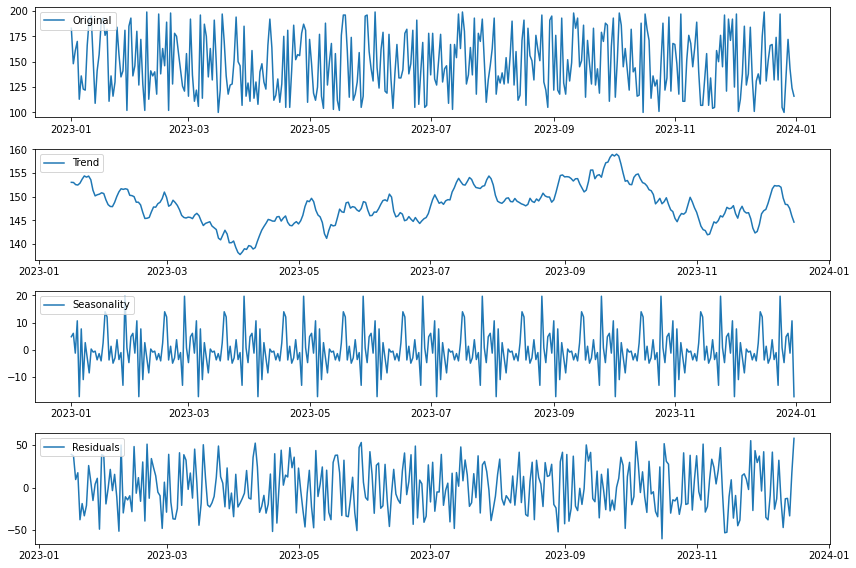

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose Time Series
decomposition = seasonal_decompose(time_series["Sales"], model="additive", period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Decomposition
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(time_series["Sales"], label="Original")
plt.legend(loc="upper left")
plt.subplot(4, 1, 2)
plt.plot(trend, label="Trend")
plt.legend(loc="upper left")
plt.subplot(4, 1, 3)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc="upper left")
plt.subplot(4, 1, 4)
plt.plot(residual, label="Residuals")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


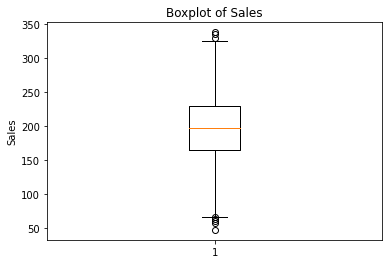

Number of Outliers: 8


In [63]:
# Boxplot to visualize outliers
plt.figure(figsize=(6, 4))
plt.boxplot(sales_data["Sales"])
plt.title("Boxplot of Sales")
plt.ylabel("Sales")
plt.show()

# Outlier Detection using IQR
Q1 = sales_data["Sales"].quantile(0.25)
Q3 = sales_data["Sales"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = sales_data[(sales_data["Sales"] < lower_bound) | (sales_data["Sales"] > upper_bound)]
print(f"Number of Outliers: {outliers.shape[0]}")


C:\Users\SAIKAT MUKHERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SAIKAT MUKHERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SAIKAT MUKHERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


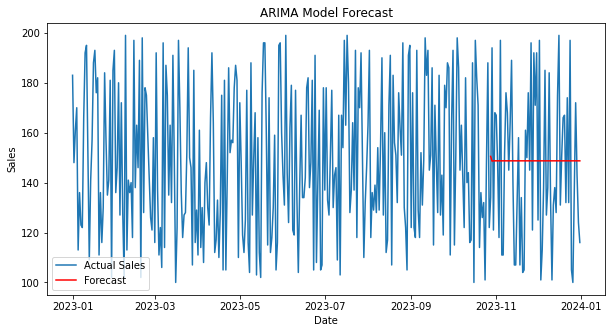

In [64]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA Model
model = ARIMA(time_series["Sales"], order=(1, 1, 1))
result = model.fit()

# Plot Forecast vs Actual
time_series["Forecast"] = result.predict(start=300, end=364, dynamic=True)
plt.figure(figsize=(10, 5))
plt.plot(time_series["Sales"], label="Actual Sales")
plt.plot(time_series["Forecast"], label="Forecast", color="red")
plt.title("ARIMA Model Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()
